# ECE 269 - Linear Algebra - Fall 2019 - Final Project - EigenFaces

## EigenFaces project worked on by:-
## Name :- Anirudh Swaminathan
## PID :- A53316083
## Email ID :- aswamina@ucsd.edu

In [65]:
%matplotlib inline

# for working with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# randomness
import random

# matrices
import numpy as np

# eigen value computation
from scipy.linalg import eigh

# for rotating images
from scipy import ndimage as ndi

In [2]:
# dataset directory specified here
data_dir = "../datasets/"

In [3]:
# data stuff here
neutral_imgs = []
smiling_imgs = []
mean_img = None
dataset = []
image_size = None
eigen_faces = None

### Load the data

In [4]:
for i in range(200):
    nimg = mpimg.imread(data_dir + str(i + 1) + "a.jpg")
    simg = mpimg.imread(data_dir + str(i + 1) + "b.jpg")
    neutral_imgs.append(nimg)
    smiling_imgs.append(simg)
dataset = neutral_imgs[:190]
dataset = np.array(dataset)
image_size = (dataset.shape[1], dataset.shape[2])
dataset = dataset.reshape(dataset.shape[0], dataset.shape[1] * dataset.shape[2])
# 31266 * 190 - dataset shape
dataset = np.transpose(dataset)
print(dataset.dtype)

uint8


In [5]:
dataset = dataset.astype(np.float64)

In [6]:
print(np.min(dataset), np.max(dataset))

0.0 255.0


In [7]:
# normalize the dataset between 0 and 1
#dataset = dataset / 255.0
#print(dataset.dtype, np.min(dataset), np.max(dataset))

In [8]:
# normalize the neutral and smiling images between 0 and 1
print(type(nimg), type(simg))
print(type(neutral_imgs), type(smiling_imgs))
neutral_imgs = np.array(neutral_imgs)
smiling_imgs = np.array(smiling_imgs)
print(type(neutral_imgs), type(smiling_imgs))
neutral_imgs = neutral_imgs.astype(np.float64)
smiling_imgs = smiling_imgs.astype(np.float64)
print(np.min(neutral_imgs), np.max(neutral_imgs))
print(np.min(smiling_imgs), np.max(smiling_imgs))
#neutral_imgs = neutral_imgs / 255.0
#smiling_imgs = smiling_imgs / 255.0
#print(neutral_imgs.dtype, smiling_imgs.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'list'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.0 255.0
0.0 255.0


In [9]:
print(np.min(neutral_imgs), np.max(neutral_imgs))
print(np.min(smiling_imgs), np.max(smiling_imgs))

0.0 255.0
0.0 255.0


### Display 5 random neutral and smiling images to verify if the data loading was correct

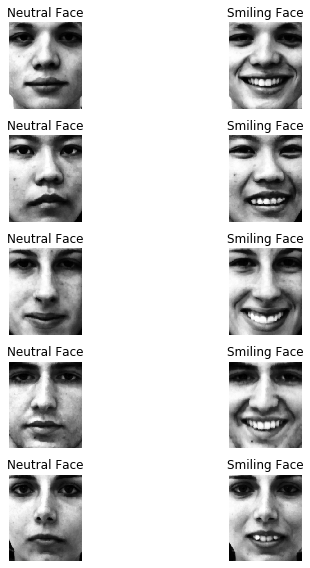

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(5):
    j = random.randint(0, 199)
    n = neutral_imgs[j]
    s = smiling_imgs[j]
    
    # display the neutral image
    axes[i][0].imshow(n, cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Neutral Face")
    
    # display the smiling image
    axes[i][1].imshow(s, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Smiling Face")
    
plt.tight_layout()
fig.canvas.draw()

### Question a) - Computing the PCs using 1st individual's neutral expressions and plotting the singular values of the data matrix

#### Compute Mean Face

In [11]:
# calculate the mean face for the dataset
num_imgs = dataset.shape[1]
# print(self.dataset.shape)
mean_img = np.matmul(dataset, np.ones((num_imgs, 1))) / num_imgs
# 31266 * 1 - mean_img
mean_img = mean_img
print(mean_img.shape, mean_img.dtype, np.min(mean_img), np.max(mean_img))

(31266, 1) float64 3.057894736842105 247.05789473684212


In [12]:
#print(np.min(mean_img), np.max(mean_img))

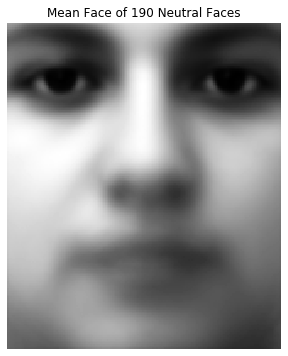

In [13]:
# plot the mean face of the neutral expressions
plt_mean_img = mean_img.reshape(image_size[0], image_size[1])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.imshow(plt_mean_img, cmap="gray")
axes.axis('off')
axes.set_title("Mean Face of 190 Neutral Faces")
fig.canvas.draw()

#### Compute the eigen values and the corresponding eigen faces

In [14]:
# 31266 * 180
#print(dataset.shape, mean_img.shape)
mean_offset = dataset - mean_img

# 180*180
mod_cov = np.matmul(np.transpose(mean_offset), mean_offset)
print(mod_cov.shape, mod_cov.dtype, np.min(mod_cov), np.max(mod_cov))

# check if this is a symmetric matrix
print(np.allclose(mod_cov, np.transpose(mod_cov)))

(190, 190) float64 -40690704.10872575 116958723.93337949
True


In [15]:
# compute the eigen values and the corresponding eigenvectors in ascending order
# 190 eigen values
# 190 * 190 eigen vectors
# ith column - corresponding to the ith eigen vector
eig_vals, mod_eig_vecs = eigh(mod_cov)
print(eig_vals.shape, mod_eig_vecs.shape)
print(eig_vals.dtype, mod_eig_vecs.dtype)
print(np.sqrt(np.sum(np.square(mod_eig_vecs), 0)))

# 31266 * 190 - eigen vectors of the original data
eig_vecs = np.matmul(mean_offset, mod_eig_vecs)

# normalize the eigen vectors now
# 31266 * 190 normalized eigen vectors
print(eig_vecs.shape, eig_vecs.dtype)
norm_cnst = np.sqrt(np.sum(np.square(eig_vecs), 0))
print(norm_cnst.shape, norm_cnst.dtype)
eigen_faces = np.divide(eig_vecs, norm_cnst)
print(eigen_faces.shape, eigen_faces.dtype)
print(np.sqrt(np.sum(np.square(eigen_faces), 0)))

(190,) (190, 190)
float64 float64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(31266, 190) float64
(190,) float64
(31266, 190) float64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [16]:
# flip both eigen values and eigen vectors to ensure the largest eigen vectors are at the front
eig_vals = np.flip(eig_vals)
eigen_faces = np.flip(eigen_faces, 1)

#### Plot the singular values of the data matrix

Since the matrix $A^TA$ is symmetric, it's singluar values are the square root of its eigen values, and they are real.

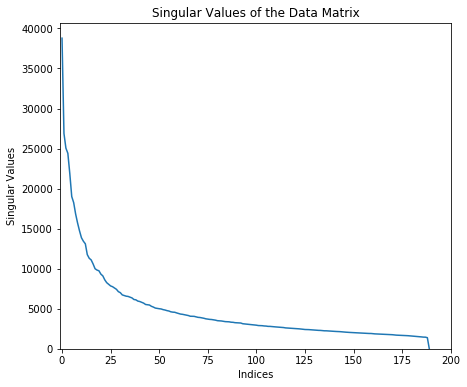

In [17]:
# plot the singular values of the data matrix
indices = [i for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(indices, np.sqrt(eig_vals))
axes.set_xlabel("Indices")
axes.set_ylabel("Singular Values")
axes.set_xlim(-1, 200)
axes.set_ylim(0,)
axes.set_title("Singular Values of the Data Matrix")
fig.canvas.draw()

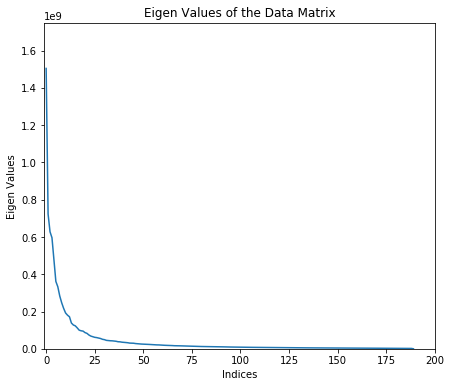

In [18]:
# plot the eigen values of the data matrix
indices = [i for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(indices, eig_vals)
axes.set_xlabel("Indices")
axes.set_ylabel("Eigen Values")
axes.set_xlim(-1, 200)
axes.set_ylim(0, 1.75e9)
axes.set_title("Eigen Values of the Data Matrix")
fig.canvas.draw()

For choosing the eigen values, we take the largest eigen values as they indicate the maximum variance between the different features. We can choose the number of PCs as the one that gives >95% variance between the features.

In [19]:
tot = np.sum(eig_vals)
su = 0
ans = -1
for j in range(190):
    su += eig_vals[j]
    if su/tot>0.95:
        ans = j+1
        print("The largest {} eigen vectors encode >95% variability of the dataset".format(ans))
        break

The largest 96 eigen vectors encode >95% variability of the dataset


Hence, we can choose $96$ largest eigen values and their corresponding eigen vectors to represent greater than $95%$ variability of the given dataset of faces.

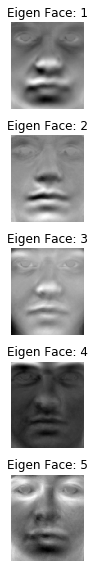

In [20]:
# plot the top 5 eigen faces
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 8), sharex="all", sharey="all")
for i in range(5):
    img = eigen_faces[:, i]
    plot_face = img.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i].imshow(plot_face, cmap="gray")
    axes[i].axis('off')
    axes[i].set_title("Eigen Face: {}".format(i+1))
    
plt.tight_layout()
fig.canvas.draw()

### Question b) - Reconstruction of a neutral individual's PCs using different number of PC's

In [21]:
def reconstruct_image(orig, pcs):
    """A function to reconstruct the original image with the given PCs"""
    # perform mean subtraction
    # 31566 * 1
    #print("Original: {}, Mean Image: {}".format(orig.shape, mean_img.shape))
    mean_sub = orig - mean_img
    #print(mean_sub.shape)
    
    # calculate the weights
    # l * 31566 * 31566 * 1 = l * 1
    #print(pcs.shape)
    w = np.matmul(np.transpose(pcs), mean_sub)
    #print(w.shape)
    
    # 31566 * l * l * 1 = 31566 * 1
    recon = np.matmul(pcs, w) + mean_img
    #print(recon.shape)
    mse = np.mean(np.square(orig - recon))
    return recon, mse

In [22]:
# random index to pick image from
rand_ind = random.randint(0, 189)
original_img = dataset[:, rand_ind]
#print(original_img.shape)
original_img = original_img[:, np.newaxis]
#print(original_img.shape)

In [23]:
mses = []
recs = []

# Reconstruct the image for all the PCs
for j in range(190):
    #print(dataset.shape)
    pcs = eigen_faces[:, :(j+1)]
    #print(pcs.shape)
    rec, mse = reconstruct_image(original_img, pcs)
    recs.append(rec)
    mses.append(mse)

In [24]:
print(len(mses), min(mses), max(mses))

190 3.0772467434108722e-25 1595.8297699573227


In [25]:
print(mses)

[1595.8297699573227, 1435.7694047272819, 1420.531778997881, 1419.0978947617646, 1381.4577680746243, 1272.8921600242304, 1172.4235513884378, 1170.773311460562, 833.1305280786197, 791.4888421500411, 753.7278730876942, 752.3586570268722, 729.9736384798962, 673.2765670011189, 661.2894336452728, 657.9392442373219, 657.482153415318, 598.688050204355, 590.8412214421062, 578.283563888675, 577.4604540909155, 577.242982221037, 514.1613669843944, 491.0917962449671, 417.4575617838279, 408.38696094907124, 404.9526313304336, 386.6842260288364, 338.7734016704137, 296.45946902254184, 295.9150908387756, 295.7115537748461, 277.2715893609801, 251.33489299506178, 248.98101859937648, 247.2566741635306, 247.16889942624206, 241.23955801125427, 226.61664283303082, 211.052728557477, 207.78105951120688, 203.95209607392363, 203.7957255740715, 203.69486482676106, 200.7089298570274, 200.64467998983818, 196.96735076295607, 164.61857134091068, 164.44536591069541, 163.45280915240292, 162.65284431705794, 162.271797998

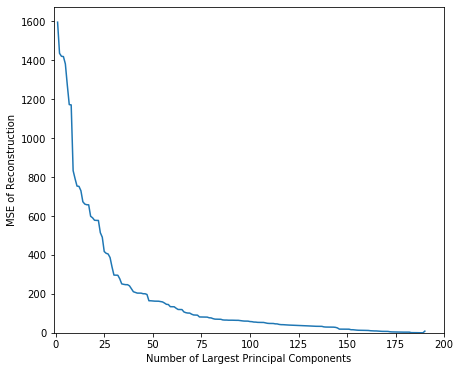

In [27]:
# plot the singular values of the data matrix
num_eigs = [i+1 for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(num_eigs, mses)
axes.set_xlabel("Number of Largest Principal Components")
axes.set_ylabel("MSE of Reconstruction")
axes.set_xlim(-1, 200)
axes.set_ylim(0, )
#axes.set_title("Number of Principal Components vs Mean Squared Error of Reconstruction")
fig.canvas.draw()

(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64


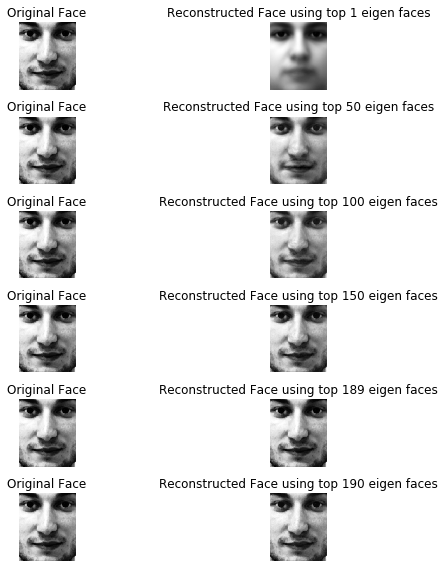

In [28]:
# Plot the reconstructed images for 5 different number of PCs
num_pcs = [1, 50, 100, 150, 189, 190]
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(len(num_pcs)):
    r = recs[num_pcs[i] - 1]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Face")
    
    # display the smiling image
    axes[i][1].imshow(r, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Reconstructed Face using top {} eigen faces".format(num_pcs[i]))
    
plt.tight_layout()
fig.canvas.draw()

In [29]:
r = recs[188]
print(r.shape, r.dtype, np.min(r), np.max(r))
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(31266, 1) float64 -9.539036227579345e-13 255.00000000000063
(31266, 1) float64 0.0 255.0


$$\textbf{Qualitative Results}$$
I tried reconstruction of a random neutral image using different number of principal components with the largest eigen values <br>
I found that the reconstructed image was not close for just $1$ principal component. <br>
For more principal components, I found that the reconstructed image starts resembling the original image. <br>
$$\textbf{Quantitave Results}$$
As the number of principal components associated with the largest eigen values used to recreate the neutral image increases, the MSE for my model keeps on decreasing to $0$. This is to be expected as this neutral image was used in the computation of all the $190$ eigen faces, and hence, this neutral image can be spanned by all the $190$ principal components. <br>

### Question c) - Reconstruction of a smiling individual's PCs using different number of PC's

In [30]:
# random index to pick image from
#rand_ind = random.randint(0, 189)
original_img = smiling_imgs[rand_ind, :, :]
print(original_img.shape)
original_img = original_img.reshape(image_size[0] * image_size[1], 1)
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(193, 162)
(31266, 1) float64 0.0 255.0


In [31]:
sm_mses = []
sm_recs = []

# Reconstruct the image for all the PCs
for j in range(190):
    #print(dataset.shape)
    pcs = eigen_faces[:, :(j+1)]
    #print(pcs.shape)
    rec, mse = reconstruct_image(original_img, pcs)
    sm_recs.append(rec)
    sm_mses.append(mse)

In [32]:
print(len(sm_mses), min(sm_mses), max(sm_mses))

190 573.8699140584291 2728.5858360945695


In [33]:
print(sm_mses)

[2728.5858360945695, 2658.3562456449317, 2591.9539395640504, 2582.6993169725515, 2522.752238492415, 2231.8032183666805, 1871.5200417828978, 1870.091134017415, 1798.9812546261426, 1779.8395398764767, 1593.0234964028698, 1592.3367514073984, 1571.2246554203732, 1543.1837271379102, 1539.5948237807695, 1539.4877842085161, 1511.9504045059664, 1504.213616688428, 1434.4983532957692, 1434.3345115032835, 1218.8837356549773, 1201.4868937402107, 1160.852532851605, 1159.8942278096335, 1158.0556859554945, 1154.1728544249147, 1143.3411700030122, 1137.6102425232837, 1102.978759408366, 1068.4455005296834, 1053.3765445534411, 1042.637158703163, 1017.479029465856, 1008.5404951588835, 993.6246936006216, 990.9313956450582, 989.7142271102313, 977.2175154990936, 964.5608967246933, 950.1150759909251, 941.9139449313004, 941.7812788489658, 941.4634740515052, 934.0271238818159, 932.2494549202639, 922.1891400052087, 920.1147888263293, 913.5143016731903, 912.9629396866117, 912.3494053791464, 907.5687756340677, 907

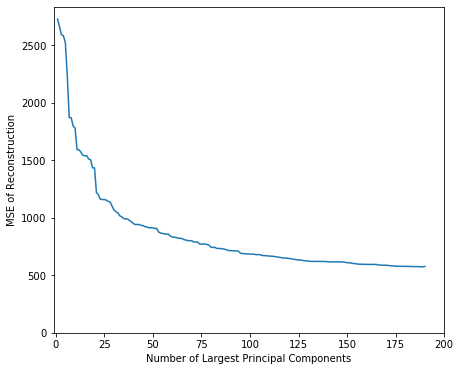

In [34]:
# plot the singular values of the data matrix
num_eigs = [i+1 for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(num_eigs, sm_mses)
axes.set_xlabel("Number of Largest Principal Components")
axes.set_ylabel("MSE of Reconstruction")
axes.set_xlim(-1, 200)
axes.set_ylim(0, )
#axes.set_title("Number of Principal Components vs Mean Squared Error of Reconstruction")
fig.canvas.draw()

(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64


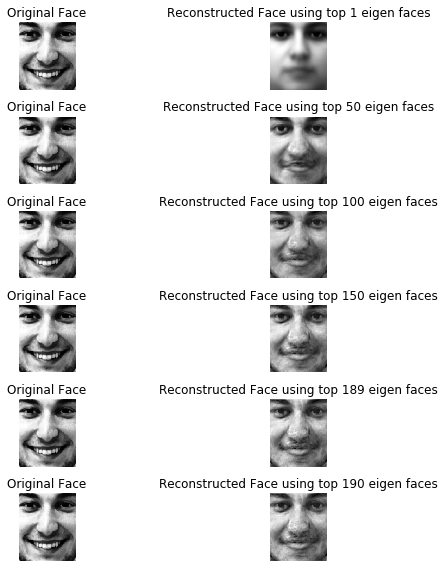

In [35]:
# Plot the reconstructed images for 5 different number of PCs
num_pcs = [1, 50, 100, 150, 189, 190]
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(len(num_pcs)):
    r = sm_recs[num_pcs[i] - 1]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Face")
    
    # display the smiling image
    axes[i][1].imshow(r, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Reconstructed Face using top {} eigen faces".format(num_pcs[i]))
    
plt.tight_layout()
fig.canvas.draw()

In [36]:
r = sm_recs[188]
print(r.shape, r.dtype, np.min(r), np.max(r))
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(31266, 1) float64 -33.0271650932025 285.7761778258087
(31266, 1) float64 0.0 255.0


$$\textbf{Qualitative Results}$$
I tried reconstruction of a random neutral image using different number of principal components with the largest eigen values <br>
I found that the reconstructed image was not close for just $1$ principal component. <br>
For more principal components, I found that the reconstructed image starts resembling the original image. <br>
$$\textbf{Quantitave Results}$$
As the number of principal components associated with the largest eigen values used to recreate the neutral image increases, the MSE for my model keeps on decreasing. This is to be expected, as the number of Pricipal components increases, they are able to approximately span the original image more and more. <br>
$$\textbf{Comparison with Neutral Image Reconstruction}$$
This reconstruction is not as good as the neutral images reconstruction. This is because the smiling image was not a part of process of finding the principal components. Hence, with the given principal components, we cannot span the smiling images.

### Question d) Reconstruction of test set of neutral images from the Principal Components

In [37]:
# random index to pick image from
rand_neut = random.randint(190, 199)
original_img = neutral_imgs[rand_neut, :, :]
print(original_img.shape)
original_img = original_img.reshape(image_size[0] * image_size[1], 1)
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(193, 162)
(31266, 1) float64 0.0 255.0


In [38]:
te_mses = []
te_recs = []

# Reconstruct the image for all the PCs
for j in range(190):
    #print(dataset.shape)
    pcs = eigen_faces[:, :(j+1)]
    #print(pcs.shape)
    rec, mse = reconstruct_image(original_img, pcs)
    te_recs.append(rec)
    te_mses.append(mse)

In [39]:
print(len(te_mses), min(te_mses), max(te_mses))

190 235.60229580939193 1717.150458856567


In [40]:
print(te_mses)

[1717.150458856567, 1656.1680496836348, 1573.2300605984867, 1570.4535307976723, 1401.986235566922, 744.1543107102079, 743.3073517989815, 717.4408764359713, 716.2069520945539, 714.5603644864437, 693.7294027759864, 689.2352340217583, 683.7226961103833, 672.0323620064547, 658.5978909353506, 638.4451264699368, 637.6488126074369, 624.9713900930824, 624.4030882767045, 606.0163968666768, 562.4382601388357, 560.1019680733114, 556.1993382135578, 515.6075922440556, 514.5579472754268, 513.3267549006874, 511.2805606476398, 509.8450318955129, 498.469123824496, 494.7231025802255, 487.5159633792614, 476.8612003050164, 466.20423366298814, 464.32849007719466, 461.2864401530578, 453.5859517875132, 451.02547274179557, 450.87479989632385, 450.71123200632405, 450.1758043860915, 449.7511381943021, 449.63690416873226, 442.2872528872494, 425.9318665299587, 421.8868713314205, 414.92413110273986, 413.7066922249298, 413.4493131478935, 403.1125753603792, 402.3166906006372, 394.7778858312571, 380.9225036277031, 38

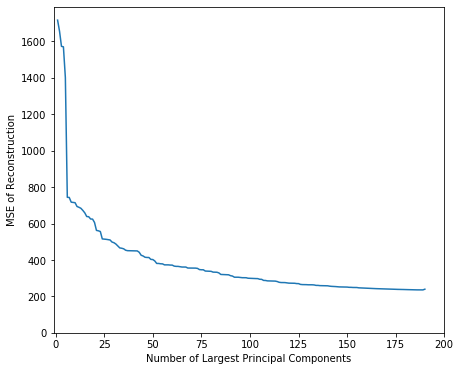

In [41]:
# plot the singular values of the data matrix
num_eigs = [i+1 for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(num_eigs, te_mses)
axes.set_xlabel("Number of Largest Principal Components")
axes.set_ylabel("MSE of Reconstruction")
axes.set_xlim(-1, 200)
axes.set_ylim(0,)
#axes.set_title("Number of Principal Components vs Mean Squared Error of Reconstruction")
fig.canvas.draw()

(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64


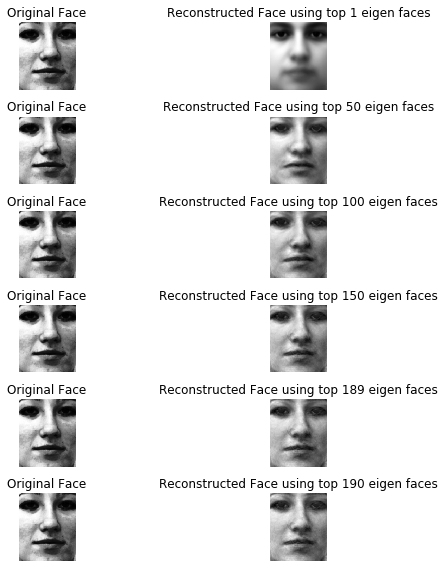

In [42]:
# Plot the reconstructed images for 5 different number of PCs
num_pcs = [1, 50, 100, 150, 189, 190]
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(len(num_pcs)):
    r = te_recs[num_pcs[i] - 1]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Face")
    
    # display the smiling image
    axes[i][1].imshow(r, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Reconstructed Face using top {} eigen faces".format(num_pcs[i]))
    
plt.tight_layout()
fig.canvas.draw()

In [43]:
r = sm_recs[188]
print(r.shape, r.dtype, np.min(r), np.max(r))
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(31266, 1) float64 -33.0271650932025 285.7761778258087
(31266, 1) float64 0.0 255.0


$$\textbf{Qualitative Results}$$
I tried reconstruction of a random neutral image using different number of principal components with the largest eigen values <br>
I found that the reconstructed image was not close for just $1$ principal component. <br>
For more principal components, I found that the reconstructed image starts resembling the original image. <br>
$$\textbf{Quantitave Results}$$
As the number of principal components associated with the largest eigen values used to recreate the neutral image increases, the MSE for my model keeps on decreasing. This is to be expected, as the number of Pricipal components increases, they are able to approximately span the original image more and more. <br>
$$\textbf{Comparison with Neutral Image Reconstruction}$$
This reconstruction is not as good as the neutral images reconstruction. This is because this neutral image was not a part of process of finding the principal components. Hence, with the given principal components, we cannot span this image.
$$\textbf{Comparison with Smiling Image Reconstruction}$$
This reconstruction is very similar to the one performed on smiling images, and the same argument applies. The fact that they do not contribute to finding the Principal Components leads to the fact that they cannot efficiently reconstruct the given image.

### Question e) Reconstruction of non-human image from the set of PCs

In [44]:
# read car
car_pth = "../datasets/car.jpg"
car_img = mpimg.imread(car_pth)
car_img = car_img.astype(np.float64)
original_img = car_img.reshape(image_size[0] * image_size[1], 1)
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(31266, 1) float64 0.0 253.0


In [45]:
# Reconstruct the image for all the PCs
#print(dataset.shape)
pcs = eigen_faces
print(eigen_faces.shape)
#print(pcs.shape)
rec, mse = reconstruct_image(original_img, pcs)

(31266, 190)


In [46]:
print(mse)

5163.088316940282


In [47]:
# reconstruct for 189 PCs
pcs = eigen_faces[:, :189]
print(pcs.shape)
rec2, mse2 = reconstruct_image(original_img, pcs)

(31266, 189)


In [48]:
print(mse2)

5161.786514091866


In [49]:
# reconstruct for all 190 pcs
pcs = eigen_faces[:, :190]
print(pcs.shape)
rec3, mse3 = reconstruct_image(original_img, pcs)

(31266, 190)


In [50]:
print(mse3)

5163.088316940282


In [56]:
recs = [rec2, rec]

(31266, 1) float64
(31266, 1) float64


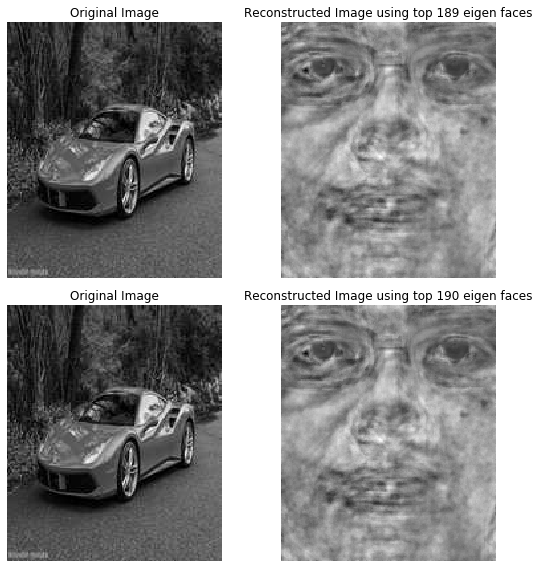

In [58]:
# Plot the reconstructed images for 5 different number of PCs
num_pcs = [189, 190]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(len(num_pcs)):
    r = recs[i]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Image")
    
    # display the smiling image
    axes[i][1].imshow(r, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Reconstructed Image using top {} eigen faces".format(num_pcs[i]))
    
plt.tight_layout()
fig.canvas.draw()

In [59]:
r = rec2
print(r.shape, r.dtype, np.min(r), np.max(r))
print(original_img.shape, original_img.dtype, np.min(original_img), np.max(original_img))

(31266, 1) float64 -62.47053509868523 281.26222558454333
(31266, 1) float64 0.0 253.0


TODO

### Question f) Reconstruction of training set neutral image for different rotations

In [64]:
original_img = dataset[:, rand_ind]
original_img = np.reshape(original_img, (image_size[0], image_size[1]))

In [75]:
mses = []
rots = []
recs = []

pcs = eigen_faces[:, :189]

# Reconstruct the image for all the PCs
for j in range(361):
    #print(dataset.shape)
    rot_image = ndi.rotate(original_img, j, reshape=False)
    rot_image = rot_image.reshape(image_size[0]*image_size[1], 1)
    rots.append(rot_image)
    #print(rot_image.shape, rot_image.dtype)
    #print(pcs.shape)
    rec, mse = reconstruct_image(rot_image, pcs)
    recs.append(rec)
    mses.append(mse)

In [76]:
print(len(mses), min(mses), max(mses))

361 3.093257772533948e-25 3886.6004531002063


In [77]:
print(mses)

[3.093257772533948e-25, 284.8358435465244, 434.19015665242625, 582.1221203287452, 715.8051905903236, 845.7698974569291, 959.5599674612771, 1063.915067264814, 1174.235977594316, 1288.5734749966807, 1399.6087811257792, 1513.6858902071453, 1623.3639800658866, 1728.5985343536347, 1840.421301098633, 1937.8303274658037, 2035.1557256563212, 2122.5949175833866, 2205.287544714635, 2278.6922954941288, 2340.9149446013566, 2397.497635460983, 2446.521458089252, 2497.4583117490683, 2548.9483647542056, 2599.1943910612404, 2652.3565404813953, 2697.3889305760526, 2754.947260406048, 2813.6844081871436, 2872.2532916694117, 2928.8018600430587, 2968.5021703301927, 3004.8533166183483, 3036.400718548942, 3057.7797606357817, 3070.0069755714508, 3079.683074471668, 3088.692794250067, 3101.7594133777925, 3115.2515584302664, 3130.3361890803094, 3137.4604156734604, 3144.961686043813, 3134.9541839949165, 3119.4181415780554, 3099.137535027134, 3073.835554872058, 3043.6157083315074, 3011.894833299263, 2975.5730219524

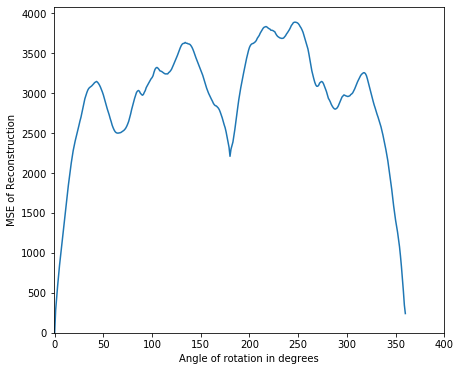

In [78]:
# plot the singular values of the data matrix
angles = [i for i in range(361)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(angles, mses)
axes.set_xlabel("Angle of rotation in degrees")
axes.set_ylabel("MSE of Reconstruction")
axes.set_xlim(-1, 400)
axes.set_ylim(0, )
#axes.set_title("Number of Principal Components vs Mean Squared Error of Reconstruction")
fig.canvas.draw()

(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64


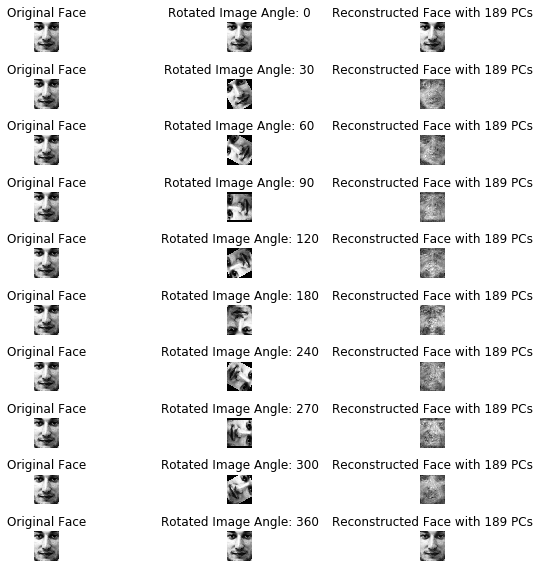

In [85]:
# Plot the reconstructed images for 5 different number of PCs
angles = [0, 30, 60, 90, 120, 180, 240, 270, 300, 360]
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 12), sharex="all", sharey="all")
for i in range(len(angles)):
    r = recs[angles[i]]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    ro = rots[angles[i]]
    print(ro.shape, ro.dtype)
    ro = ro.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Face")
    
    # display the rotated image
    axes[i][1].imshow(ro, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Rotated Image Angle: {}".format(angles[i]))
    
    # display the smiling image
    axes[i][2].imshow(r, cmap="gray")
    axes[i][2].axis('off')
    axes[i][2].set_title("Reconstructed Face with 189 PCs".format(angles[i]))
    
plt.tight_layout()
fig.canvas.draw()

In [86]:
mses = []
rots = []
recs = []

pcs = eigen_faces[:, :190]

# Reconstruct the image for all the PCs
for j in range(361):
    #print(dataset.shape)
    rot_image = ndi.rotate(original_img, j, reshape=False)
    rot_image = rot_image.reshape(image_size[0]*image_size[1], 1)
    rots.append(rot_image)
    #print(rot_image.shape, rot_image.dtype)
    #print(pcs.shape)
    rec, mse = reconstruct_image(rot_image, pcs)
    recs.append(rec)
    mses.append(mse)

In [87]:
print(len(mses), min(mses), max(mses))

361 8.577360365018189 3895.090544562232


In [88]:
print(mses)

[8.577360365018189, 291.85455666026485, 440.1849532666031, 589.5178164893243, 724.8081812373537, 856.4711361021806, 972.0044199851261, 1077.5510705190754, 1188.6180409531967, 1303.6957099710564, 1415.4052191280502, 1529.7611106409383, 1639.0397793000905, 1743.9035744801647, 1855.5579093285721, 1953.5463509682363, 2051.3584747763903, 2139.4894641823043, 2222.635457806098, 2297.112504672088, 2359.6093237281557, 2416.1860385701048, 2464.3928016857326, 2514.350542664002, 2564.6204495491643, 2613.147114546694, 2665.026211408833, 2708.509869015577, 2764.0251681890772, 2821.1211389558885, 2877.9844476120907, 2933.1238045883247, 2971.8901896572124, 3007.4794571033817, 3038.763770935014, 3059.9830086018296, 3072.130466701792, 3081.6941368262706, 3090.472750472725, 3103.397424865434, 3116.916153873569, 3131.7849771670103, 3138.768653445676, 3146.1926033014374, 3135.9483432763636, 3120.2325252020214, 3099.6692433709622, 3074.1618534397535, 3043.7541243156916, 3011.9118868113146, 2975.587408665306

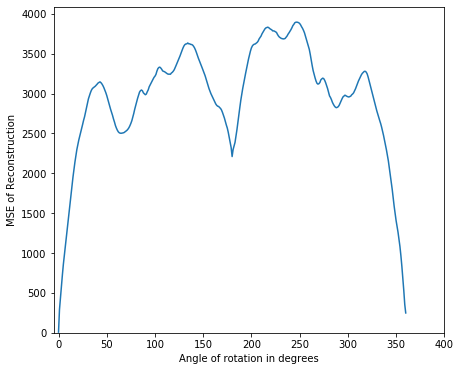

In [91]:
# plot the singular values of the data matrix
angles = [i for i in range(361)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(angles, mses)
axes.set_xlabel("Angle of rotation in degrees")
axes.set_ylabel("MSE of Reconstruction")
axes.set_xlim(-5, 400)
axes.set_ylim(0, )
#axes.set_title("Number of Principal Components vs Mean Squared Error of Reconstruction")
fig.canvas.draw()

(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64
(31266, 1) float64


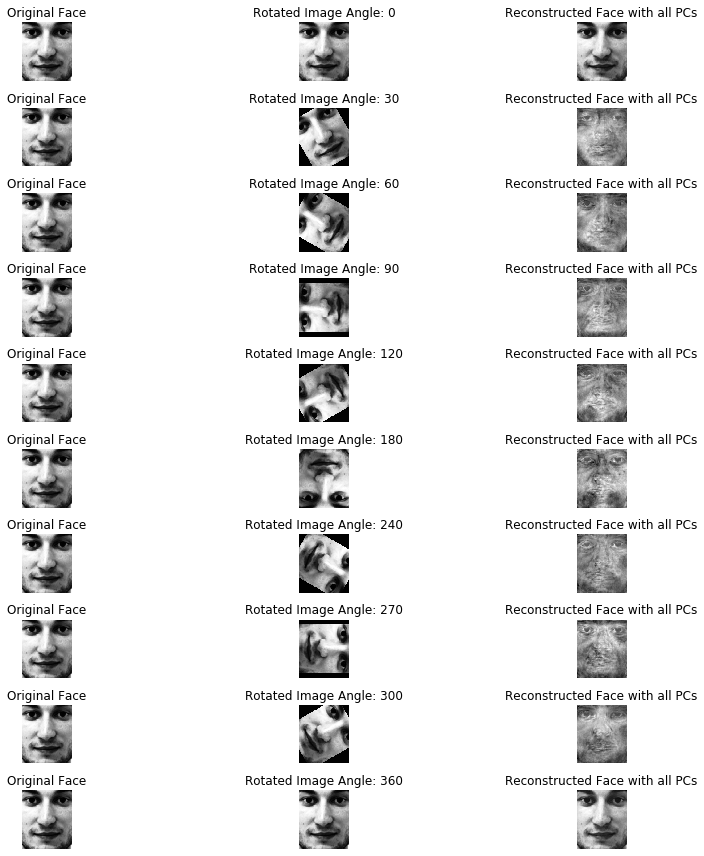

In [90]:
# Plot the reconstructed images for 5 different number of PCs
angles = [0, 30, 60, 90, 120, 180, 240, 270, 300, 360]
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 12), sharex="all", sharey="all")
for i in range(len(angles)):
    r = recs[angles[i]]
    print(r.shape, r.dtype)
    r = r.reshape(image_size[0], image_size[1])
    
    ro = rots[angles[i]]
    print(ro.shape, ro.dtype)
    ro = ro.reshape(image_size[0], image_size[1])
    
    # display the neutral image
    axes[i][0].imshow(original_img.reshape(image_size[0], image_size[1]), cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Original Face")
    
    # display the rotated image
    axes[i][1].imshow(ro, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Rotated Image Angle: {}".format(angles[i]))
    
    # display the smiling image
    axes[i][2].imshow(r, cmap="gray")
    axes[i][2].axis('off')
    axes[i][2].set_title("Reconstructed Face with all PCs".format(angles[i]))
    
plt.tight_layout()
fig.canvas.draw()

TODO

TODO - Final answers to stuff, conclusions, math